In [186]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('data/ANCO_gene_info - gene_expr_encode.csv')

In [ ]:
df = pd.read_csv('data/ANCO_gene_info - ')

In [53]:
df = df.drop('MapLocation', axis = 1)

In [120]:
df = df.dropna()

In [61]:
le = LabelEncoder()

In [63]:
df['Addiction'] = le.fit_transform(df['Addiction'])

In [66]:
tsne = TSNE()

In [169]:
km = KMeans(n_clusters=50)

In [182]:
rf = RandomForestClassifier()

In [194]:
df_with = df.drop('Addiction', axis=1)

In [195]:
data = tsne.fit_transform(df_with)

In [174]:
le.classes_

array(['alcohol', 'cocaine', 'cocaine|alcohol', 'cocaine|nicotine',
       'cocaine|nicotine|alcohol', 'cocaine|opioid|nicotine',
       'cocaine|opioid|nicotine|alcohol', 'nicotine', 'nicotine|alcohol',
       'opioid', 'opioid|alcohol', 'opioid|cocaine',
       'opioid|cocaine|alcohol', 'opioid|cocaine|nicotine',
       'opioid|cocaine|nicotine|alcohol', 'opioid|nicotine',
       'opioid|nicotine|alcohol'], dtype=object)

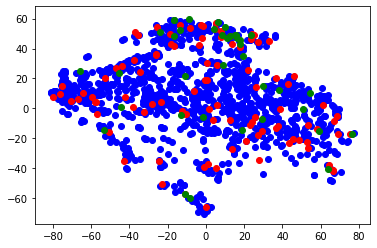

In [198]:
plt.scatter(data[:, 0][df['Addiction'] == 0], data[:, 1][df['Addiction'] == 0], c='blue')
plt.scatter(data[:, 0][df['Addiction'] == 1], data[:, 1][df['Addiction'] == 1], c='red')
plt.scatter(data[:, 0][df['Addiction'] == 2], data[:, 1][df['Addiction'] == 2], c='green')


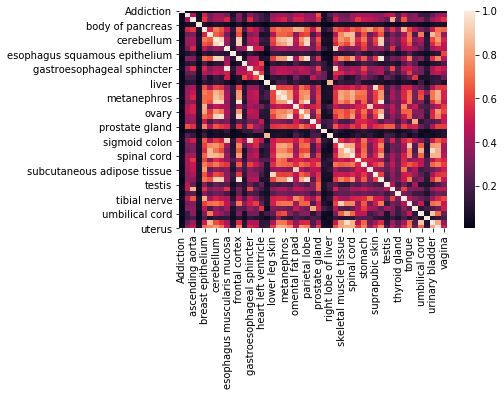

In [180]:
sns.heatmap(df.corr())

In [187]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Addiction', axis=1), df['Addiction']
)

In [188]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [189]:
np.mean(rf.predict(X_test) == y_test)

0.4444444444444444

In [191]:
from collections import Counter

In [192]:
Counter(y_test)

Counter({8: 206,
         7: 662,
         9: 6,
         16: 15,
         0: 301,
         6: 31,
         4: 31,
         15: 7,
         3: 23,
         14: 2,
         1: 28,
         10: 6,
         2: 9,
         5: 3,
         11: 1,
         12: 1})